# Welcome to Reece Boyce's Jupyter Notebook: 

#### This Code is housing my portion of analysis and coding for our final Capstone project!

###### Importing processes, and loading data!

In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from math import sqrt

In [81]:
df = pd.read_csv('Files/bom.movie_gross.csv.gz')
df_1 = pd.read_csv('Files/rt.movie_info.tsv.gz', sep='\t')
df_2 = pd.read_csv('Files/tmdb.movies.csv.gz')
df_3 = pd.read_csv('Files/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
budgets = pd.read_csv('Files/tn.movie_budgets.csv.gz')

## First Process analysis (domestic vs foreign gross profit)

###### Getting an Idea of the data we are working with.

In [82]:
#Filtering info to get an idea of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [83]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [84]:
#Using isnull to determine if I needed to clean any data
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [85]:
#Replacing ',' with nothing to be able to change the data type from object to float
df['foreign_gross']=df['foreign_gross'].str.replace(',', '')

In [86]:
#Changing df type
df.foreign_gross = df.foreign_gross.astype(float)

###### Some movies dont air domestically and vica versa! Hence we can clean and plot them seperately.

In [87]:
#Changing value to 0 to allow for analysis and to remove Null values
df['domestic_gross'].fillna(value=0, inplace=True)
df['foreign_gross'].fillna(value=0, inplace=True)

In [88]:
#Changes NaN (Null) values to 'unknown' because 
#we still wanted the data for missing studios
df['studio'].fillna(value='Unknown', inplace=True)

In [89]:
#To confirm Null values are absent in the data moving forward
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [90]:
df.drop(labels='year', axis=1, inplace=True)

In [91]:
#Groupby is used to sort the data BY studio
#from there, I sorted summed values to give 
#us a picture as to which studios bring in the highest gross income
grouped_data = df.groupby('studio', axis=0).sum().sort_values(['domestic_gross'],ascending=False).head(10)

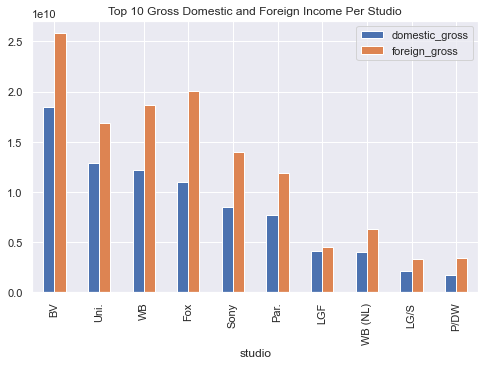

In [92]:
#One liner to create a basic plot that shows comparison
grouped_data.plot(kind='bar', title='Top 10 Gross Domestic and Foreign Income Per Studio');


## Part Two: Analysis of movie run time and ratings 

In [93]:
#Tried to look at this analysis but determined it wasnt relavent to my analysis 
df_1.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [94]:
#Merged the data from df1 to df3 but did not actually need this data... Brainfart
merged_stuff = pd.merge(df_1, df_3, how='left', on='id')
merged_stuff.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"


In [95]:
merged_stuff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54857 entries, 0 to 54856
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            54857 non-null  int64  
 1   synopsis      54680 non-null  object 
 2   rating_x      54769 non-null  object 
 3   genre         54764 non-null  object 
 4   director      49339 non-null  object 
 5   writer        45426 non-null  object 
 6   theater_date  53411 non-null  object 
 7   dvd_date      53411 non-null  object 
 8   currency      33351 non-null  object 
 9   box_office    33351 non-null  object 
 10  runtime       54001 non-null  object 
 11  studio        40204 non-null  object 
 12  review        48869 non-null  object 
 13  rating_y      40915 non-null  object 
 14  fresh         54432 non-null  object 
 15  critic        51710 non-null  object 
 16  top_critic    54432 non-null  float64
 17  publisher     54123 non-null  object 
 18  date          54432 non-nu

In [96]:
#Loaded in relevant files from IMDB for main analysis
directors_file = "files/imbd_files/directors.csv"
known_for_file= "files/imbd_files/known_for.csv"
movie_akas_file = "files/imbd_files/movie_akas.csv"
movie_basics_file = "files/imbd_files/movie_basics.csv"
movie_ratings_file= "files/imbd_files/movie_ratings.csv"
persons_file = "files/imbd_files/persons.csv"
principals_file= "files/imbd_files/principals.csv"
writers_file = "files/imbd_files/writers.csv"
# read files into dataframes
directors = pd.read_csv(directors_file)
known_for = pd.read_csv(known_for_file)
movie_akas = pd.read_csv(movie_akas_file)
movie_basics = pd.read_csv(movie_basics_file)
movie_ratings = pd.read_csv(movie_ratings_file)
persons = pd.read_csv(persons_file)
principals = pd.read_csv(principals_file)
writers = pd.read_csv(writers_file)

In [97]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [98]:
# merged movie ratings with movie basics
movie_info = pd.merge(movie_basics, movie_ratings, how="inner", on='movie_id')

In [99]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [100]:
# movies sort by most votes and avereage rating
top_movies = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 100 movies selected
top_100_movies = top_movies.iloc[:100]
# top 100 movies sorted specifically by movie rating
top_100_movies = top_100_movies.sort_values(by='averagerating', ascending=False)
#index reseted for top 100 movies
top_100_movies = top_100_movies.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_100_movies = top_100_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})

bottom_movies = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=True)
# Worst 100 movies
bottom_100_movies = bottom_movies.iloc[:100]
# top 100 movies sorted specifically by movie rating
bottom_100_movies = bottom_100_movies.sort_values(by='averagerating', ascending=True)
#index reseted for top 100 movies
bottom_100_movies = bottom_100_movies.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
bottom_100_movies = bottom_100_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})

In [101]:
top_100_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating,num_votes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...
95,tt1637725,Ted,Ted,2012,106.0,"Comedy,Fantasy",6.9,538367
96,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
97,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery",6.5,432800
98,tt2975590,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,2016,151.0,"Action,Adventure,Fantasy",6.5,576909


In [102]:
bottom_100_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating,num_votes
0,tt2447822,Momok jangan cari pasal!,Momok jangan cari pasal!,2012,85.0,Comedy,1.0,5
1,tt6792126,Jak se mori revizori,Jak se mori revizori,2018,NaN,Comedy,1.0,5
2,tt8426154,Pup Scouts,Pup Scouts,2018,72.0,Animation,1.0,5
3,tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5
4,tt9208638,Carnivale' Creepshow,Carnivale' Creepshow,2014,74.0,Horror,1.2,5
...,...,...,...,...,...,...,...,...
95,tt1629270,Fear of Flying,Fear of Flying,2010,97.0,"Comedy,Romance",3.8,5
96,tt1624421,Gringa,Gringa,2010,75.0,"Comedy,Drama",3.8,5
97,tt1462715,Vanguard,Vanguard,2010,84.0,Action,3.8,5
98,tt1891976,Vanpaia sutôrîzu: Chasers,Vanpaia sutôrîzu: Chasers,2011,NaN,Drama,3.8,5


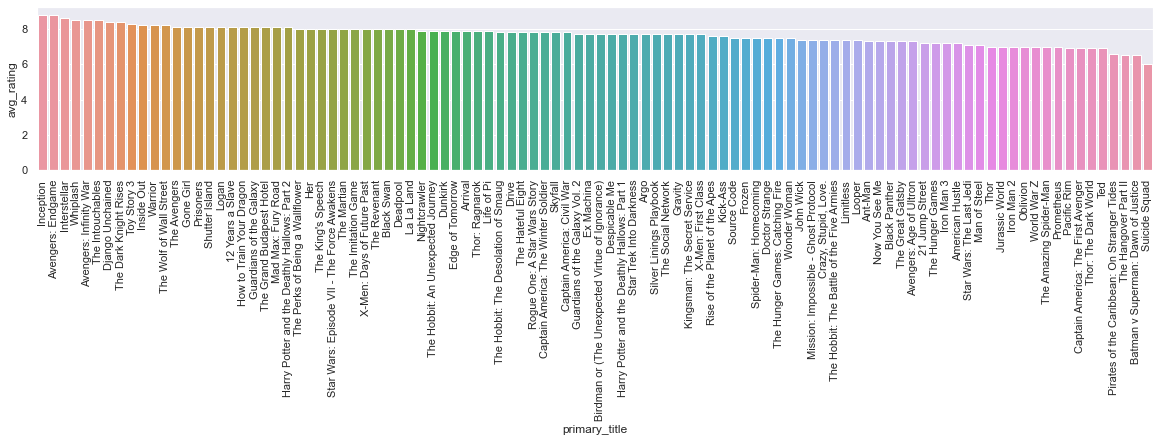

In [103]:
# graph of top 100 movies 
plt.figure(figsize=(20,3))
plt.xticks(rotation=90)
sns.barplot(x=top_100_movies.primary_title, y=top_100_movies.avg_rating);

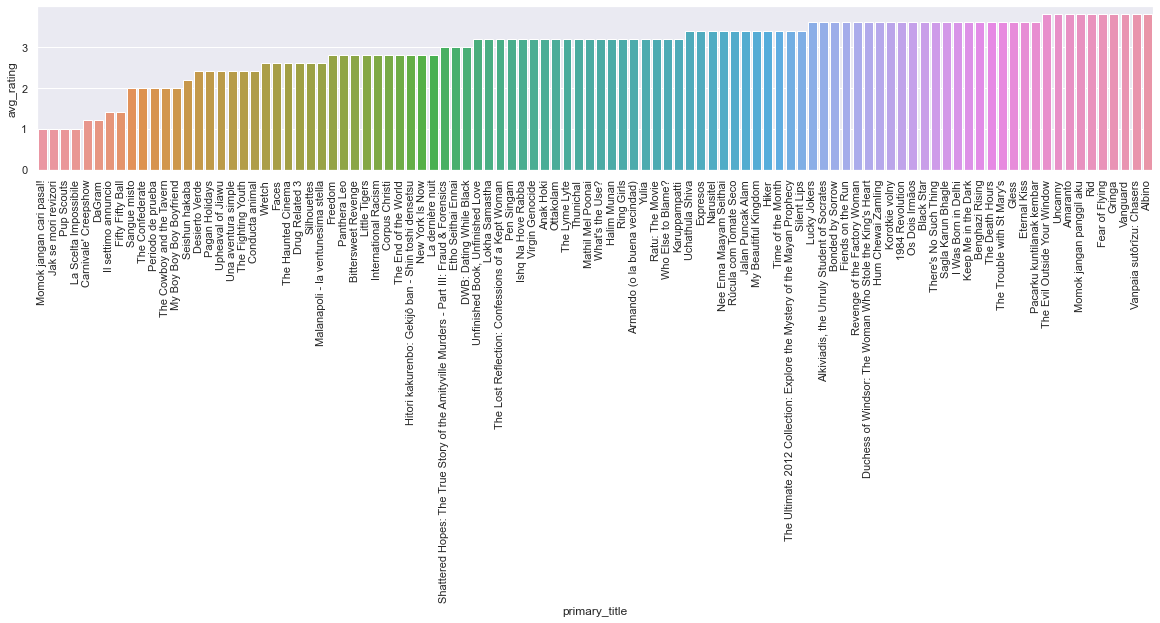

In [104]:
#Bottom 100 movies 
plt.figure(figsize=(20,3))
plt.xticks(rotation=90)
sns.barplot(x=bottom_100_movies.primary_title, y=bottom_100_movies.avg_rating);

In [105]:
# run_time_review = top_100_movies.drop(labels=['primary_title', 'original_title', 'start_year', 'movie_id', 'genres', 'num_votes'],axis=1)
# run_time_review

In [106]:
movies = top_movies.sort_values(by='averagerating', ascending=False)
movies = top_movies.reset_index().drop(columns='index')
movies = top_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})

In [107]:
movies.drop(labels=['primary_title', 'original_title', 'start_year', 'movie_id', 'genres', 'num_votes'], axis=1)

,runtime_minutes,avg_rating
2387,148.0,8.8
2241,164.0,8.4
280,169.0,8.6
12072,165.0,8.4
325,143.0,8.1
...,...,...
73137,75.0,1.2
25026,85.0,1.0
63570,NaN,1.0
70740,72.0,1.0


In [108]:
movies.dropna(axis=0, subset=['runtime_minutes'], inplace=True)

In [109]:
new_list = movies['runtime_minutes']

In [110]:
np.percentile(new_list, [1, 50, 99.4])

array([ 45.,  91., 170.])

In [111]:
good_data = new_list[(new_list < 170) & (new_list > 45)]
good_data

2387     148.0
2241     164.0
280      169.0
12072    165.0
325      143.0
         ...  
72840     74.0
73137     75.0
25026     85.0
70740     72.0
70815     64.0
Name: runtime_minutes, Length: 65096, dtype: float64

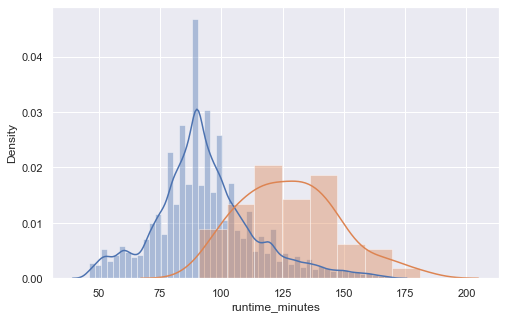

In [112]:
#Distribution Plot for the top 100 movies 
sns.distplot(good_data)
sns.distplot(top_100_movies['runtime_minutes']);


In [113]:
bad_data = bottom_100_movies[(bottom_100_movies['runtime_minutes'] < 170) & (bottom_100_movies['runtime_minutes'] > 45)]
bad_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating,num_votes
0,tt2447822,Momok jangan cari pasal!,Momok jangan cari pasal!,2012,85.0,Comedy,1.0,5
2,tt8426154,Pup Scouts,Pup Scouts,2018,72.0,Animation,1.0,5
3,tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5
4,tt9208638,Carnivale' Creepshow,Carnivale' Creepshow,2014,74.0,Horror,1.2,5
5,tt9366716,DaGram,DaGram,2018,75.0,Comedy,1.2,5
...,...,...,...,...,...,...,...,...
94,tt2325941,Rid,Rid,2012,94.0,"Comedy,Horror,Romance",3.8,5
95,tt1629270,Fear of Flying,Fear of Flying,2010,97.0,"Comedy,Romance",3.8,5
96,tt1624421,Gringa,Gringa,2010,75.0,"Comedy,Drama",3.8,5
97,tt1462715,Vanguard,Vanguard,2010,84.0,Action,3.8,5


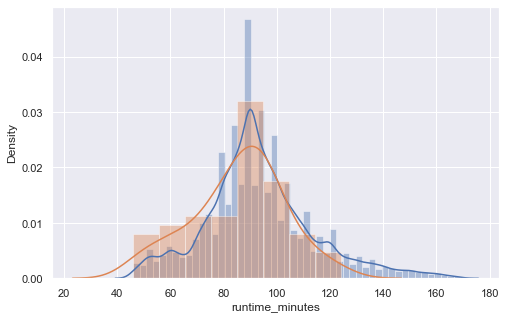

In [114]:
sns.distplot(good_data)
sns.distplot(bad_data['runtime_minutes']);

In [115]:
# movies = top_movies.sort_values(by='averagerating', ascending=False)
# movies = top_movies.reset_index().drop(columns='index')
# movies = top_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})

In [116]:
# movies.drop(labels=['primary_title', 'original_title', 'start_year', 'movie_id', 'genres', 'num_votes'], axis=1)

In [117]:
# movies.dropna(axis=0, subset=['runtime_minutes'], inplace=True)

In [118]:
# new_list = movies['runtime_minutes']

In [119]:
# np.percentile(new_list, [1, 50, 99.4])

In [120]:
# good_data = new_list[(new_list < 170) & (new_list > 45)]
# good_data

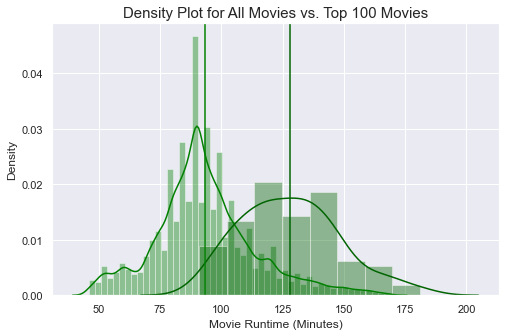

In [121]:
sns.color_palette("light:#5A9", as_cmap=True)
runcolor =top_100_movies['runtime_minutes']
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(good_data, color='Green')
sns.distplot(top_100_movies['runtime_minutes'], color='DarkGreen')#31a354
plt.xlabel("Movie Runtime (Minutes)", size=12)
plt.title("Density Plot for All Movies vs. Top 100 Movies", size=15)
plt.axvline(x=good_data.mean(), color='Green')
plt.axvline(x=runcolor.mean(), color='DarkGreen');

In [122]:
st.normaltest(good_data, axis=0)

NormaltestResult(statistic=4370.667885589705, pvalue=0.0)

## Z test: Tried it and it didnt produce expected results

In [123]:
#Population standard deviation
sigma = np.std(good_data)
mu = good_data.mean()
x_bar = top_100_movies['runtime_minutes'].mean()
n = 100
mu
x_bar

127.99

In [124]:
z = (x_bar - mu)/(sigma/sqrt(n))

In [125]:
st.norm.cdf(z)

1.0

In [126]:
pval = 1 - st.norm.cdf(z)
pval

0.0

## T-test: Was able to find correlation

##### Null Hypothesis: Movie run time has no affect on movie ratings

##### Alternative Hypothesis: Movie run time has an affect on movie ratings 

In [127]:
sd = np.std(top_100_movies['runtime_minutes'], ddof=1)
mu = new_list.mean()
x_bar = top_100_movies['runtime_minutes'].mean()
n = 100
df = 99
alpha= 0.05
print('The standard deviation of the sample =', sd)
print('The mean of the population =', mu)
print('The mean of the sample is =', x_bar)
print('The number of observations is =', n)

The standard deviation of the sample = 20.002270073189397
The mean of the population = 94.6540400990398
The mean of the sample is = 127.99
The number of observations is = 100


In [128]:
#Used to find our observed t-statistic
t_stat= (x_bar -  mu)/(sd/np.sqrt(n))
t_stat

16.666088288470306

In [129]:
#Critical T-value which is the baseline our tstat needs to be to not accept Null
t_crit = st.t.ppf(1 - 0.05, df=99)
t_crit

1.6603911559963895

In [130]:
#shows that our alpha of .05 is correct
st.t.cdf(t_crit, df=99)

0.9499999999979238

In [131]:
#Re-affirms findings that we reject Null
p_value = st.t.sf(t_stat, df=99)
p_value

8.619752364999059e-31

## Graph below shows that we can reject the null hypothesis at a significance level of 0.05


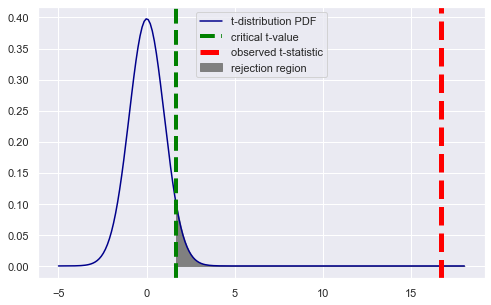

In [132]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.linspace(-5, 18, 200)
y = st.t.pdf(x, df, 0, 1)

ax.plot(x, y, color='darkblue', label="t-distribution PDF")
ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")
ax.axvline(t_stat, color='Red', linestyle='--', lw=5,label='observed t-statistic')

ax.legend();

In [133]:
st.ttest_ind(top_100_movies['runtime_minutes'], good_data)

Ttest_indResult(statistic=16.73420721135627, pvalue=9.986397435720001e-63)

In [134]:
budgets['production_budget'] = budgets['production_budget'].str.replace('$','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$','')

In [135]:
budgets['production_budget'] = budgets['production_budget'].str.replace(',','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',','')

In [136]:
budgets = budgets.drop(columns=['id', 'release_date'])
# Rename movie row to primary_title for consistency with previous tables
budgets = budgets.rename(columns={'movie': 'primary_title'})

In [137]:
budgets['production_budget'] = budgets['production_budget'].astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)
budgets.dtypes

primary_title         object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [138]:
net = budgets.worldwide_gross - budgets.production_budget
budgets['net_revenue'] = net

In [139]:
second_suggestion = pd.merge(movie_info, budgets, how="inner", on='primary_title')

In [140]:
second_suggestion.drop('original_title', axis=1)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,net_revenue
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,45000000.0,0.0,73706.0,-44926294.0
1,tt0326592,The Overnight,2010,88.0,NaN,7.5,24,200000.0,1109808.0,1165996.0,965996.0
2,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,200000.0,1109808.0,1165996.0,965996.0
3,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,25000000.0,720828.0,9313302.0,-15686698.0
4,tt4339118,On the Road,2014,89.0,Drama,6.0,6,25000000.0,720828.0,9313302.0,-15686698.0
...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,2016,NaN,Drama,9.1,28,9200000.0,2684904.0,4199334.0,-5000666.0
2871,tt8824064,Heroes,2019,88.0,Documentary,7.3,7,400000.0,655538.0,655538.0,255538.0
2872,tt8976772,Push,2019,92.0,Documentary,7.3,33,38000000.0,31811527.0,49678401.0,11678401.0
2873,tt9024106,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,6000000.0,18107621.0,18107621.0,12107621.0


In [141]:
second_suggestion.dropna(axis=0, inplace=True)

In [142]:
second_suggestion.isnull().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
production_budget    0
domestic_gross       0
worldwide_gross      0
net_revenue          0
dtype: int64

In [150]:
second_suggestion.sort_values(by='net_revenue',axis=0, ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,net_revenue
1279,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2538,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,300000000.0,678815482.0,2.048134e+09,1.748134e+09
8,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,215000000.0,652270625.0,1.648855e+09,1.433855e+09
2190,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074,190000000.0,353007020.0,1.518723e+09,1.328723e+09
115,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,225000000.0,623279547.0,1.517936e+09,1.292936e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2549,tt7232438,The Promise,Puen Tee Raluek,2017,114.0,"Drama,Horror,Thriller",6.1,629,90000000.0,8224288.0,1.055142e+07,-7.944858e+07
2548,tt6072400,The Promise,The Promise,2016,90.0,Thriller,5.8,8,90000000.0,8224288.0,1.055142e+07,-7.944858e+07
2719,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",6.4,147834,90000000.0,0.0,0.000000e+00,-9.000000e+07
469,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",5.4,19823,150000000.0,21392758.0,3.954976e+07,-1.104502e+08


In [151]:
top_100_rev = second_suggestion.sort_values(by='net_revenue',axis=0, ascending=False).iloc[:100]

In [156]:
top_100_runtime = top_100_rev['runtime_minutes']
top_100_runtime

1279     93.0
2538    149.0
8       124.0
2190    137.0
115     143.0
        ...  
1781    133.0
1525    137.0
718     137.0
717      94.0
2392    107.0
Name: runtime_minutes, Length: 100, dtype: float64

In [159]:
rev_movies = second_suggestion['runtime_minutes']

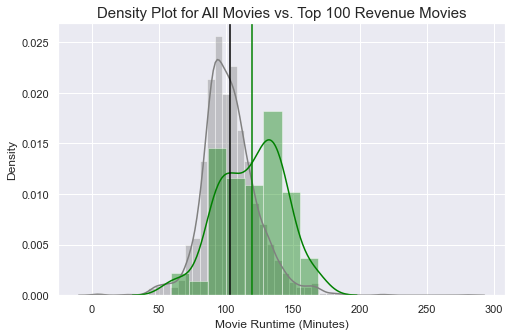

In [189]:
labels = rev_movies
sns.distplot(rev_movies, color='Grey')
sns.distplot(top_100_runtime, color='Green')
plt.xlabel("Movie Runtime (Minutes)", size=12)
plt.title("Density Plot for All Movies vs. Top 100 Revenue Movies", size=15)
plt.axvline(x=top_100_runtime.mean(), color='Green')
plt.axvline(x=rev_movies.mean(), color='Black')
ax.legend();

In [167]:
sd = np.std(top_100_runtime, ddof=1)
mu = rev_movies.mean()
x_bar = top_100_runtime.mean()
n = 100
df = 99
alpha= 0.05
print('The standard deviation of the sample =', sd)
print('The mean of the population =', mu)
print('The mean of the sample is =', x_bar)
print('The number of observations is =', n)

The standard deviation of the sample = 24.012225421584102
The mean of the population = 102.9720203488372
The mean of the sample is = 119.33
The number of observations is = 100


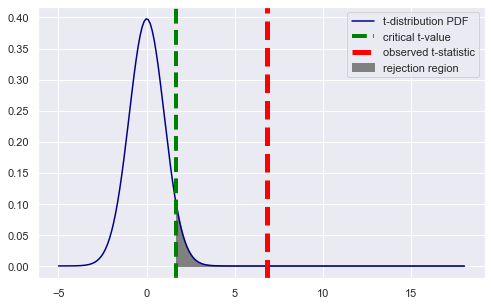

In [169]:
t_stat= (x_bar -  mu)/(sd/np.sqrt(n))
t_crit = st.t.ppf(1 - 0.05, df=99)
st.t.cdf(t_crit, df=99)


fig, ax = plt.subplots(figsize=(8,5))

x = np.linspace(-5, 18, 200)
y = st.t.pdf(x, df, 0, 1)

ax.plot(x, y, color='darkblue', label="t-distribution PDF")
ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")
ax.axvline(t_stat, color='Red', linestyle='--', lw=5,label='observed t-statistic')

ax.legend();

In [171]:
p_value = st.t.sf(t_stat, df=99)
p_value 

3.776128936742952e-10